<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Les-imports-et-configuration-du-document" data-toc-modified-id="Les-imports-et-configuration-du-document-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Les imports et configuration du document</a></span><ul class="toc-item"><li><span><a href="#La-lecture-des-fichiers-d'un-répértoire" data-toc-modified-id="La-lecture-des-fichiers-d'un-répértoire-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>La lecture des fichiers d'un répértoire</a></span></li></ul></li><li><span><a href="#La-temperature-mensuelle" data-toc-modified-id="La-temperature-mensuelle-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>La temperature mensuelle</a></span></li><li><span><a href="#La-météo-mensuelle" data-toc-modified-id="La-météo-mensuelle-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>La météo mensuelle</a></span></li><li><span><a href="#La-météo-----hebdomadaire" data-toc-modified-id="La-météo-----hebdomadaire-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>La météo     hebdomadaire</a></span></li><li><span><a href="#La-météo-----journalière" data-toc-modified-id="La-météo-----journalière-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>La météo     journalière</a></span></li></ul></div>

# Les imports et configuration du document

In [1]:
import pandas as pd 
import seaborn as sns
import warnings 
import os
import time
from datetime import datetime
from matplotlib import pyplot as plt

warnings.filterwarnings(action="ignore")

%matplotlib inline
if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=3)

In [2]:
import glob
os.chdir('C:\\Users\etien\\Documents\\CCI\\_HUB\\cours\\2024-2025\\big_data\\_git\\donnees')

# 1. Lister les fichiers csv
csvs = glob.glob(os.path.join('meteo', '*', '*.csv'), recursive=True)
csvs

['meteo\\2017\\synop.201701.csv',
 'meteo\\2017\\synop.201702.csv',
 'meteo\\2017\\synop.201703.csv',
 'meteo\\2017\\synop.201704.csv',
 'meteo\\2017\\synop.201705.csv',
 'meteo\\2017\\synop.201706.csv',
 'meteo\\2017\\synop.201707.csv',
 'meteo\\2017\\synop.201708.csv',
 'meteo\\2017\\synop.201709.csv',
 'meteo\\2017\\synop.201710.csv',
 'meteo\\2017\\synop.201711.csv',
 'meteo\\2017\\synop.201712.csv',
 'meteo\\2018\\synop.201801.csv',
 'meteo\\2018\\synop.201802.csv',
 'meteo\\2018\\synop.201803.csv',
 'meteo\\2018\\synop.201804.csv',
 'meteo\\2018\\synop.201805.csv',
 'meteo\\2018\\synop.201806.csv',
 'meteo\\2018\\synop.201807.csv',
 'meteo\\2018\\synop.201808.csv',
 'meteo\\2018\\synop.201809.csv',
 'meteo\\2018\\synop.201810.csv',
 'meteo\\2018\\synop.201811.csv',
 'meteo\\2018\\synop.201812.csv',
 'meteo\\2019\\synop.201901.csv',
 'meteo\\2019\\synop.201902.csv',
 'meteo\\2019\\synop.201903.csv',
 'meteo\\2019\\synop.201904.csv',
 'meteo\\2019\\synop.201905.csv',
 'meteo\\2019\

[fichier for fichier in csvs ]

In [3]:
def lectureFichiersMeteo(repertoire='meteo_test'):
    listeFichiers = []
    for dirname, dirnames, filenames in os.walk(repertoire):
        for filename in filenames:
            if filename.rfind('synop') >= 0 :
                listeFichiers.append(os.path.join(dirname, filename))
        
    meteo = pd.concat([ pd.read_csv(fichier,
                           sep=';',
                           usecols=['numer_sta','date','dd','ff','t','u','vv',
                                    'pres','rr1','rr3','rr6','rr12','rr24'],
                           na_values='mq',
                           dtype={'numer_sta':str,'date':str},
                          ).rename( columns={'numer_sta':'Station',
                                              'date':'DateHeure',
                                              'dd':'DirectionVent',
                                              'ff':'VitesseVent',
                                              't':'Temperature',
                                              'u':'Humidite',
                                              'vv':'Visibilite',
                                              'pres':'Pression',
                                              'rr1' :'Precipitation01',
                                              'rr3' :'Precipitation03',
                                              'rr6' :'Precipitation06',
                                              'rr12':'Precipitation12',
                                              'rr24':'Precipitation24'}) 
                         for fichier in listeFichiers],
                         ignore_index=True)
    
    
    meteo["DateHeure"] = pd.to_datetime(meteo["DateHeure"], format='%Y%m%d%H%M%S')
    meteo.Temperature  = meteo.Temperature - 273.15
    meteo.Pression     = meteo.Pression / 100
    meteo.Visibilite   = meteo.Visibilite / 1000
    meteo['Mois']      = meteo.DateHeure.dt.month
    meteo['Annee']     = meteo.DateHeure.dt.year
    meteo['AnneeMois'] = meteo.DateHeure.dt.year*100 + meteo.DateHeure.dt.month
    meteo['AnneeJour'] = meteo.DateHeure.dt.year*1000 + meteo.DateHeure.dt.day
    meteo['Semaine']   = meteo.DateHeure.dt.isocalendar().week
    meteo['MoisJour']  = meteo.DateHeure.dt.month*100 + meteo.DateHeure.dt.day
    meteo['JourA']     = meteo.DateHeure.dt.dayofyear
    return meteo    

In [4]:
! dir meteo

 Le volume dans le lecteur C s'appelle Windows-SSD
 Le num�ro de s�rie du volume est 84DC-AF7F

 R�pertoire de C:\Users\etien\Documents\CCI\_HUB\cours\2024-2025\big_data\_git\donnees\meteo

12/11/2024  14:11    <DIR>          .
22/11/2024  10:08    <DIR>          ..
12/11/2024  14:11    <DIR>          2017
12/11/2024  14:11    <DIR>          2018
12/11/2024  14:11    <DIR>          2019
12/11/2024  14:11    <DIR>          2020
12/11/2024  14:11    <DIR>          2021
12/11/2024  14:11    <DIR>          2022
12/11/2024  14:11    <DIR>          2023
               0 fichier(s)                0 octets
               9 R�p(s)  724�197�089�280 octets libres


## La lecture des fichiers d'un répértoire 

In [5]:
donnees = lectureFichiersMeteo(repertoire='meteo')

In [6]:
donnees.head()

,Station,DateHeure,DirectionVent,VitesseVent,Temperature,Humidite,Visibilite,Pression,Precipitation01,Precipitation03,Precipitation06,Precipitation12,Precipitation24,Mois,Annee,AnneeMois,AnneeJour,Semaine,MoisJour,JourA
0,07005,2017-01-01,0.0,0.0,-3.9,96.0,1.74,1018.0,0.0,0.0,0.0,0.0,0.2,1,2017,201701,2017001,52,101,1
1,07015,2017-01-01,0.0,0.0,-3.1,98.0,0.52,1020.9,0.0,0.0,0.0,0.0,0.0,1,2017,201701,2017001,52,101,1
2,07020,2017-01-01,260.0,7.0,8.4,79.0,15.00,1023.4,0.0,0.0,0.0,0.0,0.0,1,2017,201701,2017001,52,101,1
3,07027,2017-01-01,0.0,0.0,-5.0,98.0,0.18,1018.8,0.0,0.0,0.0,0.0,0.0,1,2017,201701,2017001,52,101,1
4,07037,2017-01-01,0.0,0.0,-4.5,93.0,0.13,1008.7,0.0,0.0,0.0,0.0,0.0,1,2017,201701,2017001,52,101,1


In [7]:
donnees.shape

(1172478, 20)

In [8]:
postes = pd.read_csv('postesSynop.csv',sep=';',dtype={'ID':str})
postes.Nom =postes.Nom.apply(lambda x : x if x in ['CLERMONT-FD','MONT-DE-MARSAN',
                                       'ST-PIERRE','ST-BARTHELEMY METEO'] 
                               else x[0:x.find('-')] 
                                    if x.find('-') != -1 else x).apply(lambda x : str(x).title())
postes.Altitude = postes.Altitude.astype('int16')
postes = postes[postes.ID < '08000']

In [9]:
postes.loc[postes.Latitude  < postes.Latitude.mean(),'Zone'] = 'S'
postes.loc[postes.Latitude  > postes.Latitude.mean(),'Zone'] = 'N'
postes.loc[postes.Longitude < postes.Longitude.mean(),'Zone'] += 'O'
postes.loc[postes.Longitude > postes.Longitude.mean(),'Zone'] += 'E'

In [10]:
postes.head()

,ID,Nom,Latitude,Longitude,Altitude,Zone
0,07005,Abbeville,50.136000,1.834000,69,NO
1,07015,Lille,50.570000,3.097500,47,NE
2,07020,Pte De La Hague,49.725167,-1.939833,6,NO
3,07027,Caen,49.180000,-0.456167,67,NO
4,07037,Rouen,49.383000,1.181667,151,NO


In [11]:
donnees = postes.merge(donnees, how = "inner", 
                     left_on = "ID", right_on = "Station").drop(["ID","Station"], axis = "columns")

In [12]:
donnees['Precipitation'] =  donnees['Precipitation03'].combine_first(donnees['Precipitation06']/2)\
                                                      .combine_first(donnees['Precipitation12']/4)\
                                                      .combine_first(donnees['Precipitation24']/8)\
                                                      .combine_first(donnees['Precipitation01']*3)

In [13]:
donnees.drop(columns=['Precipitation06',
                    'Precipitation12',
                    'Precipitation24',
                    'Precipitation01',
                    'Precipitation03'], inplace=True)

### Indexes Creation

1/ Pour une station donnée ['Nom', 'Latitude', 'Longitude', 'Altitude', 'Zone', 'DateHeure'] sont identiques 

2/ Permet de regrouper les donnees par un index ( == group by ??)

In [14]:
d2 = donnees.groupby(['Nom','Latitude','Longitude','Altitude','Zone','DateHeure']).all()
donnees.set_index(['Nom', 'Latitude', 'Longitude', 'Altitude', 'Zone', 'DateHeure'],inplace=True)

# Test pour vérifier que groupby & set index sont égaux 

d2

#donnees.set_index(['Nom'],inplace=True)

DirectionVent  \
Nom       Latitude  Longitude Altitude Zone DateHeure                            
Abbeville 50.136000 1.834     69       NO   2017-01-01 00:00:00          False   
                                            2017-01-01 03:00:00          False   
                                            2017-01-01 06:00:00          False   
                                            2017-01-01 09:00:00          False   
                                            2017-01-01 12:00:00          False   
...                                                                        ...   
Troyes    48.324667 4.020     112      NE   2023-10-31 09:00:00           True   
                                            2023-10-31 12:00:00           True   
                                            2023-10-31 15:00:00           True   
                                            2023-10-31 18:00:00           True   
                                            2023-10-31 21:00:00           True   

                                                                 VitesseVent  \
Nom       Latitude  Longitude Altitude Zone DateHeure                          
Abbeville 50.136000 1.834     69       NO   2017-01-01 00:00:00        False   
                                            2017-01-01 03:00:00        False   
                                            2017-01-01 06:00:00        False   
                                            2017-01-01 09:00:00        False   
                                            2017-01-01 12:00:00        False   
...                                                                      ...   
Troyes    48.324667 4.020     112      NE   2023-10-31 09:00:00         True   
                                            2023-10-31 12:00:00         True   
                                            2023-10-31 15:00:00         True   
                                            2023-10-31 18:00:00         True   
                                            2023-10-31 21:00:00         True   

                                                                 Temperature  \
Nom       Latitude  Longitude Altitude Zone DateHeure                          
Abbeville 50.136000 1.834     69       NO   2017-01-01 00:00:00         True   
                                            2017-01-01 03:00:00         True   
                                            2017-01-01 06:00:00         True   
                                            2017-01-01 09:00:00         True   
                                            2017-01-01 12:00:00         True   
...                                                                      ...   
Troyes    48.324667 4.020     112      NE   2023-10-31 09:00:00         True   
                                            2023-10-31 12:00:00         True   
                                            2023-10-31 15:00:00         True   
                                            2023-10-31 18:00:00         True   
                                            2023-10-31 21:00:00         True   

                                                                 Humidite  \
Nom       Latitude  Longitude Altitude Zone DateHeure                       
Abbeville 50.136000 1.834     69       NO   2017-01-01 00:00:00      True   
                                            2017-01-01 03:00:00      True   
                                            2017-01-01 06:00:00      True   
                                            2017-01-01 09:00:00      True   
                                            2017-01-01 12:00:00      True   
...                                                                   ...   
Troyes    48.324667 4.020     112      NE   2023-10-31 09:00:00      True   
                                            2023-10-31 12:00:00      True   
                                            2023-10-31 15:00:00      True   
                                            2023-10-31 18:00:00      

In [15]:
donnees.to_parquet('donnees_meteo.gzip',compression='gzip', engine='pyarrow')

In [16]:
!dir donnees_meteo.gzip

 Le volume dans le lecteur C s'appelle Windows-SSD
 Le num�ro de s�rie du volume est 84DC-AF7F

 R�pertoire de C:\Users\etien\Documents\CCI\_HUB\cours\2024-2025\big_data\_git\donnees

25/11/2024  15:43         6�765�827 donnees_meteo.gzip
               1 fichier(s)        6�765�827 octets
               0 R�p(s)  724�196�925�440 octets libres


In [17]:
%%time
meteo = pd.read_parquet('donnees_meteo.gzip', engine='pyarrow')
meteo.dtypes


CPU times: total: 328 ms
Wall time: 231 ms


DirectionVent    float64
VitesseVent      float64
Temperature      float64
Humidite         float64
Visibilite       float64
Pression         float64
Mois               int32
Annee              int32
AnneeMois          int32
AnneeJour          int32
Semaine           UInt32
MoisJour           int32
JourA              int32
Precipitation    float64
dtype: object

In [18]:
meteo

DirectionVent  \
Nom       Latitude  Longitude Altitude Zone DateHeure                            
Abbeville 50.136000 1.834000  69       NO   2017-01-01 00:00:00            0.0   
                                            2017-01-01 03:00:00            0.0   
                                            2017-01-01 06:00:00            0.0   
                                            2017-01-01 09:00:00            0.0   
                                            2017-01-01 12:00:00            0.0   
...                                                                        ...   
Bastia    42.540667 9.485167  10       SE   2023-10-31 09:00:00          250.0   
                                            2023-10-31 12:00:00          140.0   
                                            2023-10-31 15:00:00          190.0   
                                            2023-10-31 18:00:00          230.0   
                                            2023-10-31 21:00:00          300.0   

                                                                 VitesseVent  \
Nom       Latitude  Longitude Altitude Zone DateHeure                          
Abbeville 50.136000 1.834000  69       NO   2017-01-01 00:00:00          0.0   
                                            2017-01-01 03:00:00          0.0   
                                            2017-01-01 06:00:00          0.0   
                                            2017-01-01 09:00:00          0.0   
                                            2017-01-01 12:00:00          0.0   
...                                                                      ...   
Bastia    42.540667 9.485167  10       SE   2023-10-31 09:00:00          6.9   
                                            2023-10-31 12:00:00          6.1   
                                            2023-10-31 15:00:00          2.0   
                                            2023-10-31 18:00:00          5.1   
                                            2023-10-31 21:00:00          4.0   

                                                                 Temperature  \
Nom       Latitude  Longitude Altitude Zone DateHeure                          
Abbeville 50.136000 1.834000  69       NO   2017-01-01 00:00:00         -3.9   
                                            2017-01-01 03:00:00         -5.1   
                                            2017-01-01 06:00:00         -4.1   
                                            2017-01-01 09:00:00         -2.2   
                                            2017-01-01 12:00:00         -0.9   
...                                                                      ...   
Bastia    42.540667 9.485167  10       SE   2023-10-31 09:00:00         22.5   
                                            2023-10-31 12:00:00         24.2   
                                            2023-10-31 15:00:00         23.5   
                                            2023-10-31 18:00:00         18.9   
                                            2023-10-31 21:00:00         17.9   

                                                                 Humidite  \
Nom       Latitude  Longitude Altitude Zone DateHeure                       
Abbeville 50.136000 1.834000  69       NO   2017-01-01 00:00:00      96.0   
                                            2017-01-01 03:00:00      94.0   
                                            2017-01-01 06:00:00      96.0   
                                            2017-01-01 09:00:00      97.0   
                                            2017-01-01 12:00:00      98.0   
...                                                                   ...   
Bastia    42.540667 9.485167  10       SE   2023-10-31 09:00:00      31.0   
                                            2023-10-31 12:00:00      26.0   
                                            2023-10-31 15:00:00      30.0   
                                            2023-10-31 18:00:00      

In [19]:
donnees = meteo.reset_index().groupby( ['Nom','Annee']).agg({'Temperature':['mean','median'], 
                                                             'Humidite':['mean','median'], 
                                                             'Visibilite':['mean','median']})
donnees.head(28)

Temperature          Humidite        Visibilite        
                       mean median       mean median       mean  median
Nom       Annee                                                        
Abbeville 2017    11.424706  11.50  80.185813   83.0  17.110993  20.000
          2018    11.557354  11.30  78.895876   83.0  15.426622  19.810
          2019    11.505668  10.90  78.417726   82.0  16.245584  19.980
          2020    12.129211  11.60  78.498121   83.0  16.943290  20.000
          2022    12.040569  11.65  78.924897   84.0  16.538787  20.000
          2023    12.855983  12.80  80.744099   84.0  16.519651  19.980
Ajaccio   2017    16.085788  15.60  70.322960   71.0  34.204374  30.000
          2018    16.807238  16.30  74.054889   76.0  31.980967  28.790
          2019    16.383946  15.80  70.415263   72.0  34.023393  32.350
          2020    16.369275  16.00  74.343814   75.0  34.345058  33.670
          2022    17.232886  16.60  71.173554   72.0  37.754097  37.685
          2023    17.827070  17.90  71.937500   73.0  35.888461  34.670
Alencon   2017    11.473315  11.20  79.608711   84.0  15.488904  19.760
          2018    11.910615  11.30  79.759189   85.0  15.820234  19.985
          2019    11.712735  10.90  77.204941   82.0  16.643427  20.000
          2020    12.455797  11.80  76.338509   82.0  16.461281  19.980
          2022    12.504134  12.20  77.198415   83.0  16.550404  20.000
          2023    13.239856  13.00  78.066074   83.0  17.189369  20.000
Bale      2017    11.274593  10.90  75.155071   80.0  26.829678  25.000
          2018    12.227111  11.60  74.115649   79.0  24.146112  20.055
          2019    11.534592  10.90  76.377488   81.0  25.670909  25.000
          2020    12.154981  11.60  73.274564   78.0  27.860649  25.000
          2022    12.600857  12.50  73.526568   79.0  26.535960  24.900
          2023    13.900124  13.80  73.192801   77.0  28.422727  25.710
Bastia    2017    16.557836  15.90  67.910163   69.0  29.825414  30.000
          2018    16.811172  16.40  74.731523   77.0  34.705535  32.005
          2019    16.572251  16.00  70.541724   72.0  33.546518  26.850
          2020    16.611744  15.90  71.450504   73.0  38.981258  40.300

In [20]:
donnees = meteo.groupby( ['Annee']).agg({'Temperature':['mean','median'], 
                                                             'Humidite':['mean','median'], 
                                                             'Visibilite':['mean','median']})
donnees.head(28)

Temperature          Humidite        Visibilite       
             mean median       mean median       mean median
Annee                                                       
2017    12.809764   12.6  74.267394   78.0  25.681198   20.0
2018    13.377477   12.9  75.278017   79.0  24.960805   20.0
2019    13.185723   12.6  73.550953   77.0  25.786390   20.0
2020    13.526039   12.9  74.193164   78.0  26.922269   20.0
2022    13.956919   13.7  73.124933   77.0  25.500373   20.0
2023    14.789073   14.8  73.160243   76.0  25.974885   20.0

In [21]:
donnees = meteo.groupby(['JourA']).agg({'Temperature':'mean', 
                                         'Humidite':'mean', 
                                         'Visibilite':'mean'})
donnees.head(28)

,Temperature,Humidite,Visibilite
JourA,,,
1,6.966796,84.595607,18.767036
2,7.228233,83.786638,21.666356
3,7.287780,82.919966,20.207028
4,7.060017,82.380482,23.088434
5,6.114243,80.605852,24.697945
6,4.945611,81.726334,21.831354
7,6.140698,82.458226,19.741284
8,7.558143,85.393521,19.996774
9,7.329602,81.694600,23.603863


In [22]:
donnees.isna().sum()

Temperature    0
Humidite       0
Visibilite     0
dtype: int64

In [23]:
donnees2 = meteo.groupby(['Nom','JourA']).agg({'Temperature':['mean','min','max','std'], 
                                         'Humidite':'mean',
                                          'DirectionVent': ['mean', 'min', 'max', 'std'],
                                         'Visibilite':'mean'}).reset_index()
donnees2[donnees2['Nom'] == 'Abbeville']
donnees2

Nom JourA Temperature                        Humidite  \
                              mean  min   max       std       mean   
0      Abbeville     1    5.692857 -5.1  14.7  5.514934  88.535714   
1      Abbeville     2    6.564286  0.0  13.8  3.646140  89.410714   
2      Abbeville     3    7.187500 -1.9  11.8  3.385641  87.875000   
3      Abbeville     4    6.760714  0.3  12.7  3.355250  87.714286   
4      Abbeville     5    6.216071  0.2  12.0  3.085495  86.250000   
...          ...   ...         ...  ...   ...       ...        ...   
15367     Troyes   362    4.325000 -0.5  12.1  3.142197  86.958333   
15368     Troyes   363    3.789583 -2.6  12.2  3.714276  87.375000   
15369     Troyes   364    5.881250 -2.4  14.4  4.417646  90.270833   
15370     Troyes   365    6.970833 -3.5  16.4  5.615441  85.312500   
15371     Troyes   366    3.625000  1.4   5.2  1.057986  89.625000   

      DirectionVent                          Visibilite  
               mean    min    max        std       mean  
0        157.857143    0.0  310.0  86.900451  12.356964  
1        217.500000    0.0  360.0  86.513268  14.276964  
2        245.178571   20.0  360.0  65.282354  15.731429  
3        249.464286    0.0  360.0  81.607033  15.283929  
4        251.607143   10.0  350.0  61.608051  16.298214  
...             ...    ...    ...        ...        ...  
15367    208.750000   40.0  340.0  76.231032  16.392500  
15368    173.541667    0.0  340.0  76.783464  14.190000  
15369    198.125000    0.0  300.0  60.517494  13.775833  
15370    202.083333    0.0  310.0  73.916524  15.673125  
15371    226.250000  180.0  320.0  58.864251  18.135000  

[15372 rows x 12 columns]

In [24]:
donnees2.reset_index()

index        Nom JourA Temperature                        Humidite  \
                                     mean  min   max       std       mean   
0          0  Abbeville     1    5.692857 -5.1  14.7  5.514934  88.535714   
1          1  Abbeville     2    6.564286  0.0  13.8  3.646140  89.410714   
2          2  Abbeville     3    7.187500 -1.9  11.8  3.385641  87.875000   
3          3  Abbeville     4    6.760714  0.3  12.7  3.355250  87.714286   
4          4  Abbeville     5    6.216071  0.2  12.0  3.085495  86.250000   
...      ...        ...   ...         ...  ...   ...       ...        ...   
15367  15367     Troyes   362    4.325000 -0.5  12.1  3.142197  86.958333   
15368  15368     Troyes   363    3.789583 -2.6  12.2  3.714276  87.375000   
15369  15369     Troyes   364    5.881250 -2.4  14.4  4.417646  90.270833   
15370  15370     Troyes   365    6.970833 -3.5  16.4  5.615441  85.312500   
15371  15371     Troyes   366    3.625000  1.4   5.2  1.057986  89.625000   

      DirectionVent                          Visibilite  
               mean    min    max        std       mean  
0        157.857143    0.0  310.0  86.900451  12.356964  
1        217.500000    0.0  360.0  86.513268  14.276964  
2        245.178571   20.0  360.0  65.282354  15.731429  
3        249.464286    0.0  360.0  81.607033  15.283929  
4        251.607143   10.0  350.0  61.608051  16.298214  
...             ...    ...    ...        ...        ...  
15367    208.750000   40.0  340.0  76.231032  16.392500  
15368    173.541667    0.0  340.0  76.783464  14.190000  
15369    198.125000    0.0  300.0  60.517494  13.775833  
15370    202.083333    0.0  310.0  73.916524  15.673125  
15371    226.250000  180.0  320.0  58.864251  18.135000  

[15372 rows x 13 columns]

## Graph de la température en fonction de la direciton du vent pour une ville données 

Ce graphique ne présente aucune correlation. 

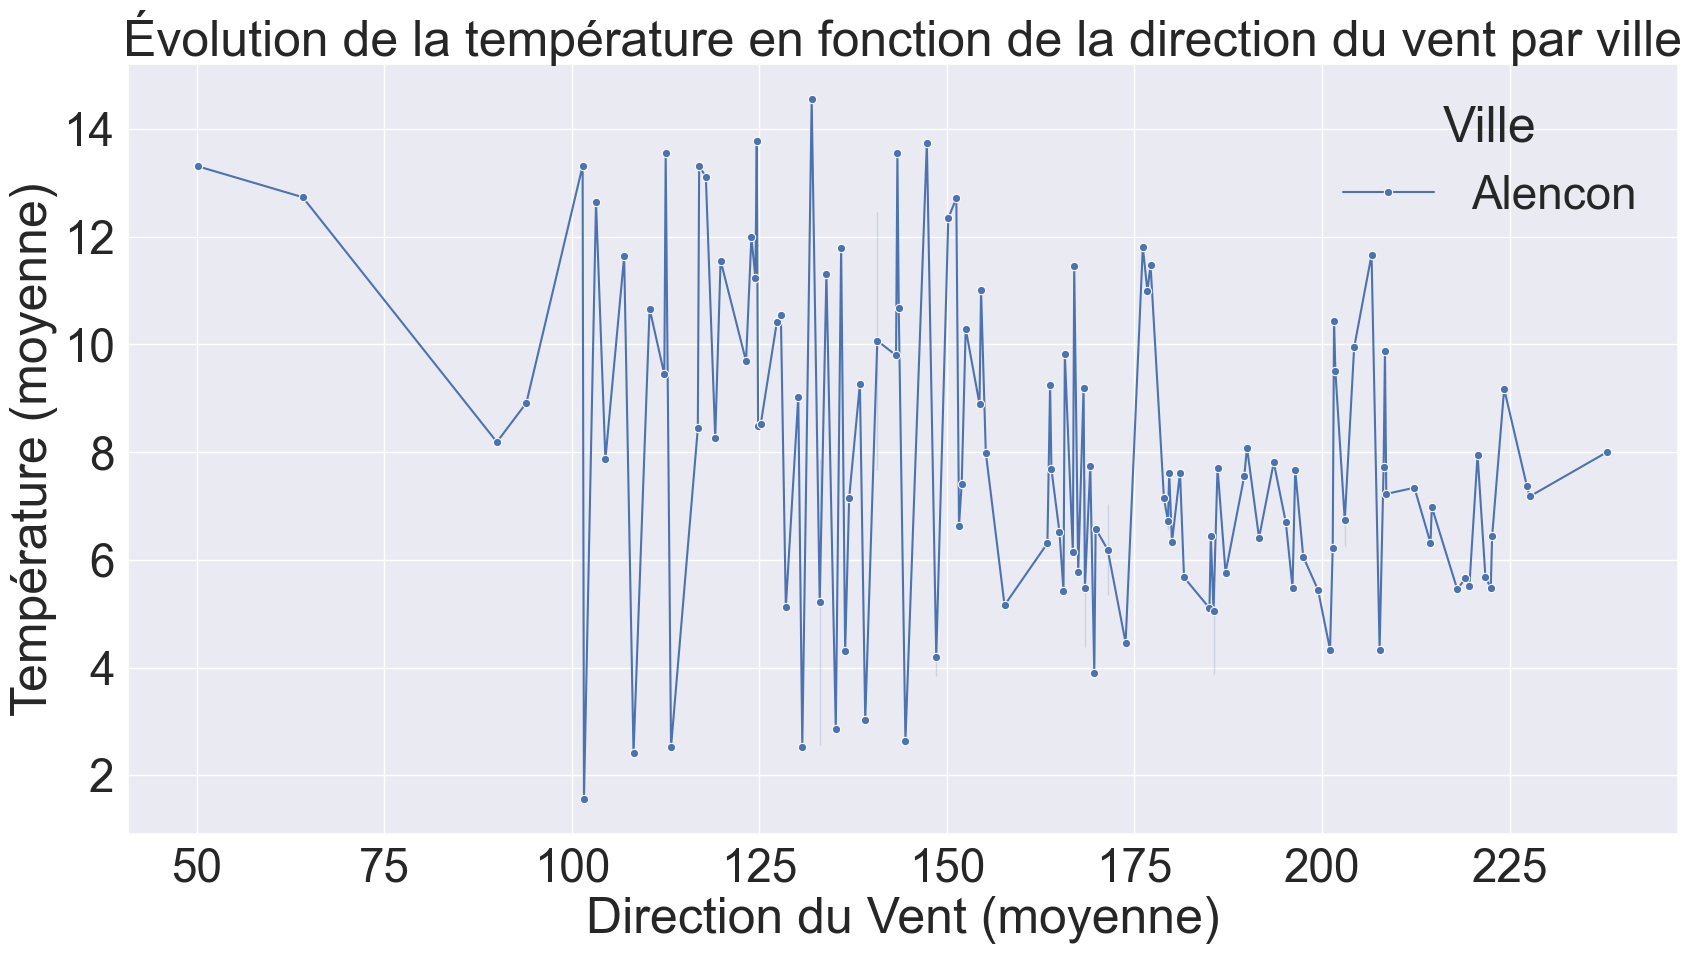

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

# Reset the index to have 'Nom' and 'JourA' as columns
Alencon_data = donnees2.loc[ (donnees2['Nom'] == 'Alencon') & (donnees2['JourA'].isin(range(1, 130))) ]

#Alencon_date = Alencon_date.loc[Alencon_date['JourA'] == [1:130]]



# Create the plot
plt.figure(figsize=(20, 10))
sns.lineplot(data=Alencon_data, x=('DirectionVent', 'mean'), y=('Temperature', 'mean'), hue='Nom', marker='o')

# Set the title and labels
plt.title("Évolution de la température en fonction de la direction du vent par ville")
plt.xlabel("Direction du Vent (moyenne)")
plt.ylabel("Température (moyenne)")

# Show the plot
plt.legend(title='Ville')
plt.show()

## Aucune correlation n'est admise 

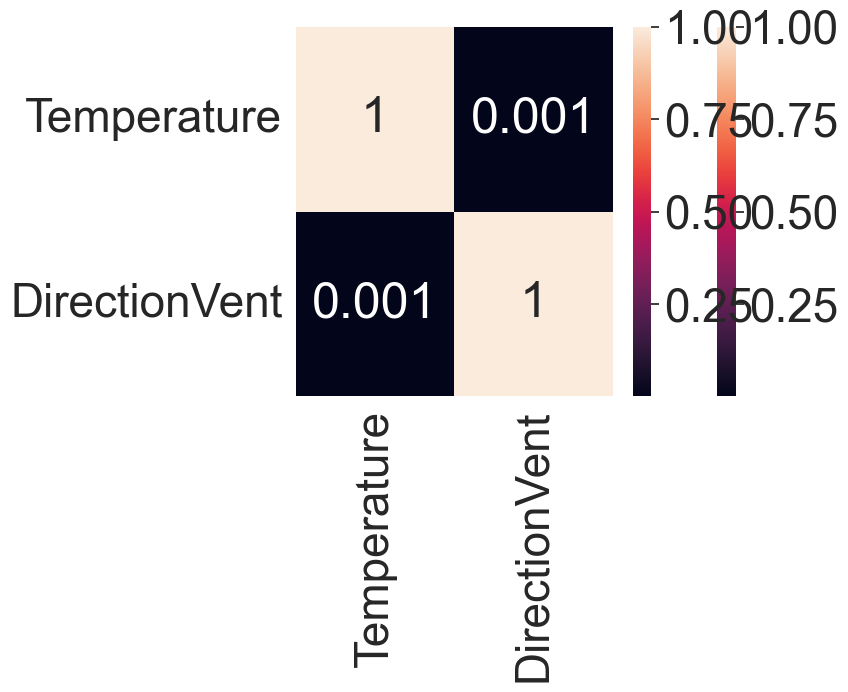

In [28]:
sns.heatmap(meteo[['Temperature', 'DirectionVent']].corr()**2, annot=True)
plt.gcf()

In [27]:
donnees3 = meteo.groupby(['Nom', 'AnneeJour']).agg({'Pression': ['min', 'max'], 'Humidite': ['min', 'max']})
donnees3

Pression         Humidite      
                         min     max      min   max
Nom       AnneeJour                                
Abbeville 2017001      989.7  1018.0     44.0  99.0
          2017002      990.9  1020.9     46.0  99.0
          2017003      985.1  1021.2     53.0  99.0
          2017004      982.6  1027.3     51.0  99.0
          2017005      984.2  1028.6     38.0  97.0
...                      ...     ...      ...   ...
Troyes    2023027      979.8  1013.6     29.0  98.0
          2023028      983.8  1016.2     35.0  98.0
          2023029      983.0  1017.2     29.0  96.0
          2023030      983.3  1015.3     37.0  97.0
          2023031      988.0  1016.2     29.0  96.0

[7812 rows x 4 columns]